Jake Thaker

# WeatherPy
----

### Analysis
1. There is no strong correlation between latitude and cloudiness. 
2. Humidity tends to stay high over a vast range of latitudes. 
3. Latitude ranging between -20 and 20 indicates a higher temperature and temperatures decrease when exploring latitudes on either side of the aforementioned range. This is in line with the theoretical assumption that temperatures are highest at and around the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls

In [3]:
# Starting URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record = record + 1
        
        # Accomodate for rate limit of API
        time.sleep(1.001)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Bathsheba
Processing Record 2 | Mataura
Processing Record 3 | Albany
City not found. Skipping...
Processing Record 4 | Bratsk
Processing Record 5 | Esperance
City not found. Skipping...
Processing Record 6 | Sorland
Processing Record 7 | Koshurnikovo
Processing Record 8 | Sioux Lookout
Processing Record 9 | Provideniya
Processing Record 10 | Camopi
Processing Record 11 | Rikitea
City not found. Skipping...
Processing Record 12 | Bagdarin
Processing Record 13 | Barrow
Processing Record 14 | Lata
Processing Record 15 | Nouadhibou
City not found. Skipping...
Processing Record 16 | Cayenne
Processing Record 17 | Bambous Virieux
City not found. Skipping...
Processing Record 18 | Mogok
Processing Record 19 | Hobart
Processing Record 20 | Hithadhoo
Processing Record 21 | San Patricio
Processing Record 22 | Gweta
Processing Record 23 | Port Alfred
Processing Record 24 | Kapaa
Processing Record 25 | Dunedin
Processin

Processing Record 221 | North Bend
Processing Record 222 | Guerrero Negro
Processing Record 223 | Sarangani
Processing Record 224 | Kathu
Processing Record 225 | Three Hills
Processing Record 226 | Xichang
Processing Record 227 | Bilibino
Processing Record 228 | Castro
Processing Record 229 | Port Elizabeth
Processing Record 230 | Tabou
City not found. Skipping...
Processing Record 231 | Vila Velha
Processing Record 232 | Tevriz
Processing Record 233 | Ossora
Processing Record 234 | Lavrentiya
Processing Record 235 | Nanning
Processing Record 236 | Yulara
Processing Record 237 | Dosso
Processing Record 238 | Pacific Grove
Processing Record 239 | Atyashevo
Processing Record 240 | Mbeya
Processing Record 241 | Levelland
City not found. Skipping...
Processing Record 242 | Teknaf
Processing Record 243 | Itajuipe
Processing Record 244 | Mpika
Processing Record 245 | Aranos
City not found. Skipping...
Processing Record 246 | Merrill
Processing Record 247 | Rindal
Processing Record 248 | Erey

Processing Record 440 | Shestakovo
Processing Record 441 | Cockburn Town
Processing Record 442 | Borinskoye
Processing Record 443 | Nosy Varika
Processing Record 444 | Torbay
Processing Record 445 | Pacora
Processing Record 446 | Zambezi
Processing Record 447 | Saldanha
Processing Record 448 | Pitimbu
Processing Record 449 | Lewiston
Processing Record 450 | Airai
Processing Record 451 | Sobolevo
Processing Record 452 | Faanui
Processing Record 453 | Rio Gallegos
Processing Record 454 | Hobyo
City not found. Skipping...
Processing Record 455 | Luebo
Processing Record 456 | Mogadishu
Processing Record 457 | Mesto Albrechtice
Processing Record 458 | Helsinki
Processing Record 459 | Mayumba
Processing Record 460 | Zhangye
Processing Record 461 | Smirnykh
Processing Record 462 | Leshukonskoye
Processing Record 463 | Asenovgrad
Processing Record 464 | Palestine
Processing Record 465 | Haines Junction
Processing Record 466 | Rongcheng
Processing Record 467 | Casa Nova
Processing Record 468 | 

### Convert Raw Data to DataFrame

In [11]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [20]:
# Save data frame to CSV
weather_data.to_csv('output_data/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bathsheba,75,BB,1554508800,83,13.22,-59.52,75.20,25.28
1,Mataura,0,NZ,1554510007,60,-46.19,168.86,53.01,1.99
2,Albany,90,US,1554510873,80,42.65,-73.75,34.00,4.70
3,Bratsk,24,RU,1554509551,53,56.15,101.63,24.80,2.24
4,Esperance,20,TT,1554510690,78,10.24,-61.45,78.80,3.36


### Plotting the Data

#### Latitude vs. Temperature Plot

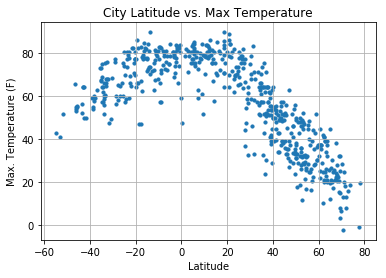

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvstemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

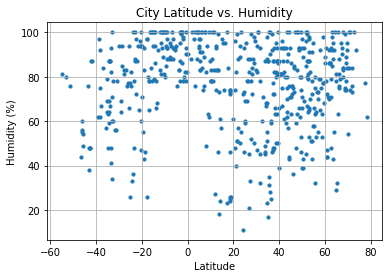

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvshumidity.png")


# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

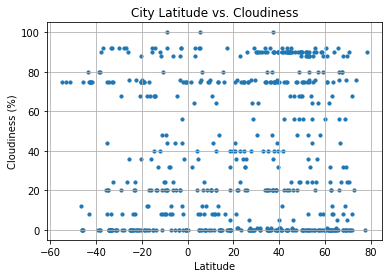

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/latvscloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

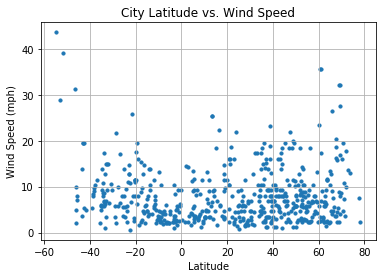

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvswindspeed.png")

# Show plot
plt.show()